In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.3MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=6c15dbd0606a8bc63cc02b1f1475e3f3f9fe2b23cbf4380a05ecceba0eb5bbba
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
#!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

In [ ]:
!mkdir /root/.kaggle/

In [ ]:
pwd

'/content'

In [ ]:
!cp /content/kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cassava-leaf-disease-classification

100% 5.76G/5.76G [01:29<00:00, 51.4MB/s]
100% 5.76G/5.76G [01:29<00:00, 69.4MB/s]


In [ ]:
!unzip cassava-leaf-disease-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/3954399974.jpg  
  inflating: train_images/3954487465.jpg  
  inflating: train_images/3954910918.jpg  
  inflating: train_images/3955391972.jpg  
  inflating: train_images/3955442838.jpg  
  inflating: train_images/3955739563.jpg  
  inflating: train_images/3955931830.jpg  
  inflating: train_images/3955972139.jpg  
  inflating: train_images/3956075690.jpg  
  inflating: train_images/3956077728.jpg  
  inflating: train_images/3956155774.jpg  
  inflating: train_images/3956271103.jpg  
  inflating: train_images/3956372146.jpg  
  inflating: train_images/3956407201.jpg  
  inflating: train_images/3956550570.jpg  
  inflating: train_images/3956605397.jpg  
  inflating: train_images/3956778160.jpg  
  inflating: train_images/3957562076.jpg  
  inflating: train_images/3957612771.jpg  
  inflating: train_images/3957807023.jpg  
  inflating: train_images/3957819631.jpg  
  inflating: train_images/395820132.jpg  
  in

In [ ]:
ls

cassava-leaf-disease-classification.zip  test_images/
kaggle.json                              test_tfrecords/
label_num_to_disease_map.json            train.csv
sample_data/                             train_images/
sample_submission.csv                    train_tfrecords/


In [ ]:
import pandas as pd
import shutil
import json
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')
import random
import glob

In [ ]:
df = pd.read_csv("train.csv", column = )
df.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [ ]:
df2  = pd.read_csv("sample_submission.csv")
df2

,image_id,label
0,2216849948.jpg,4


In [ ]:
#moving some images to the test folder
#images = os.listdir("/content/train_images")
#len(images)

In [ ]:
#test_set = glob.glob("/content/train_images/*.jpg")


In [ ]:
#moving images
#for c in random.sample (test_set,4280):
  #shutil.move(c,"/content/test_images/"+ os.path.basename(c))


In [ ]:
#images1 = os.listdir("/content/test_images")
#len(images1)

In [ ]:
#imagestrainfinal = os.listdir("/content/train_images")
#len(imagestrainfinal)

In [ ]:
#df_train = df[:15000]
#len(df_train)
#df_train['label'].value_counts()

In [ ]:
#df_test = df[15001:]
#len(df_test)
#df_test['label'].value_counts()

In [ ]:
#creating directories for the different classes
!mkdir cassava-leaf-diseases

In [ ]:
cd cassava-leaf-diseases/

/content/cassava-leaf-diseases


In [ ]:
pwd

'/content'

In [ ]:
!mkdir CBB CBSD CGM CMD Healthy

In [ ]:
ls

cassava-leaf-disease-classification.zip  label_num_to_disease_map.json
cassava-leaf-diseases/                   sample_data/
CBB/                                     sample_submission.csv
CBSD/                                    test_images/
CGM/                                     test_tfrecords/
CMD/                                     train.csv
Healthy/                                 train_images/
kaggle.json                              train_tfrecords/


In [ ]:
#code for deleting files
#!rm -r sample_submission.csv

In [ ]:
cd /content

/content


In [ ]:
CBB_dir = '/content/cassava-leaf-diseases/CBB/' 
CBSD_dir = '/content/cassava-leaf-diseases/CBSD/'
CGM_dir = '/content/cassava-leaf-diseases/CGM/'
CMD_dir = '/content/cassava-leaf-diseases/CMD/'
Healthy_dir = '/content/cassava-leaf-diseases/Healthy/'


In [ ]:
CBB_dir

'/content/cassava-leaf-diseases/CBB/'

In [ ]:
#iterate over dataframe and move data
for index, row in df.iterrows():
  #read the class and image name and move it to the appropriate folder
  if row["label"] == 0:
    #move to folder for label 0 
    shutil.move("/content/train_images/" + row["image_id"], CBB_dir + row["image_id"])
    #this function takes source and destination paths as parameters
  elif row ["label"] == 1:
    shutil.move("/content/train_images/" + row["image_id"], CBSD_dir + row["image_id"])

  elif row ["label"] == 2:
    shutil.move("/content/train_images/" + row["image_id"], CGM_dir + row["image_id"])

  elif row ["label"] == 3:
    shutil.move("/content/train_images/" + row["image_id"], CMD_dir + row["image_id"])

  elif row ["label"] == 4:
    shutil.move("/content/train_images/" + row["image_id"], Healthy_dir + row["image_id"])
  
    

In [ ]:
cd cassava-leaf-diseases/

/content/cassava-leaf-diseases


In [ ]:
#ls

In [ ]:
cd /content

/content


**Training dataset statistics**

In [ ]:
#size of the training dataset
print("Total number of training images: ", len(df)) 

Total number of training images:  21397


In [ ]:
with open('/content/label_num_to_disease_map.json') as f:
    data = json.load(f)
print('Classes')
for i in range(len(data)):
    print(i,": ", data[str(i)])

Classes
0 :  Cassava Bacterial Blight (CBB)
1 :  Cassava Brown Streak Disease (CBSD)
2 :  Cassava Green Mottle (CGM)
3 :  Cassava Mosaic Disease (CMD)
4 :  Healthy


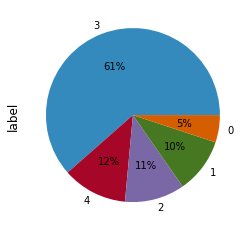

In [ ]:
#hist1 = df.hist()
#df.plot()
#pd.value_counts(df['label']).plot(kind='hist')
pd.value_counts(df['label']).plot(kind='pie',autopct='%1.0f%%')

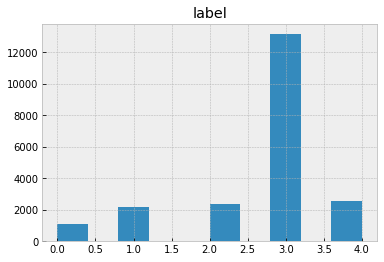

In [ ]:
hist1 = df.hist()

In [ ]:
df['label'].value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

**Image dimensions**

In [ ]:
import glob
train_dir = glob.glob("/content/cassava-leaf-diseases/**/*.jpg")
#train_dir = "/content/cassava-leaf-diseases/"
#train_dir[:10]

In [ ]:
image_sizes = []
for f in train_dir:
    image = cv2.imread(f)
    image_sizes.append(image.shape)
    
image_sizes = set(image_sizes)
image_sizes

{(600, 800, 3)}

**Visualizing the images**

In [ ]:
#listing the number of test images
#images = os.listdir("/content/test_images")
#images

**Class 0: "Cassava Bacterial Blight (CBB)"**

In [ ]:
samples = df[df['label']==0].sample(3).reset_index() #Reset index isn't necessary
samples

,index,image_id,label
0,9700,2720050371.jpg,0
1,17513,4156138691.jpg,0
2,5076,190449795.jpg,0


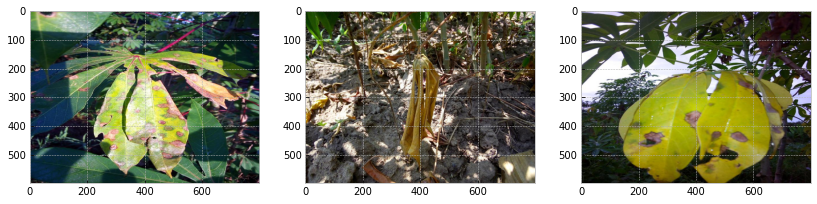

In [ ]:
plt.figure(figsize=(14,6))

for i, (image_id, label) in enumerate(zip(samples.image_id, samples.label)):
    plt.subplot(1,3,i+1)
    path = os.path.join('/content/cassava-leaf-diseases/CBB/',image_id)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()

**Class 1: "Cassava Brown Streak Disease (CBB)"**

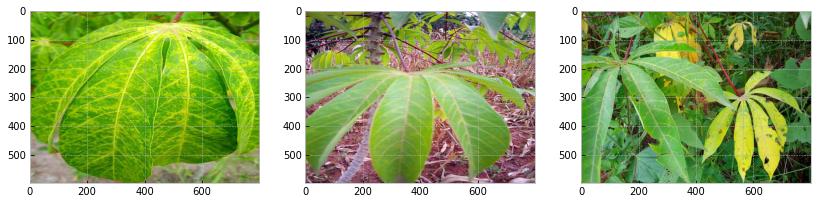

In [ ]:
samples = df[df['label']==1].sample(3)

plt.figure(figsize=(14,6))

for i, (image_id, label) in enumerate(zip(samples.image_id, samples.label)):
    plt.subplot(1,3,i+1)
    path = os.path.join('/content/cassava-leaf-diseases/CBSD',image_id)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()

**Class 2: "Cassava Green Mite (CGM)"**

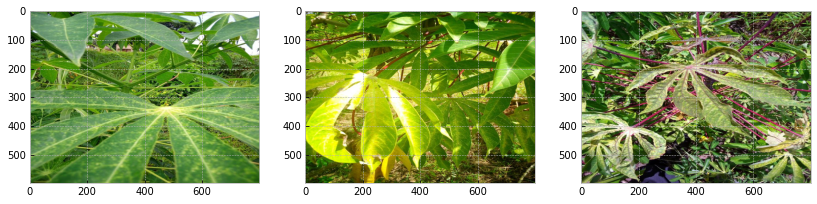

In [ ]:
samples = df[df['label']==2].sample(3)

plt.figure(figsize=(14,6))

for i, (image_id, label) in enumerate(zip(samples.image_id, samples.label)):
    plt.subplot(1,3,i+1)
    path = os.path.join('/content/cassava-leaf-diseases/CGM/',image_id)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()

**Class 3: "Cassava Mosaic Disease (CMD)"**

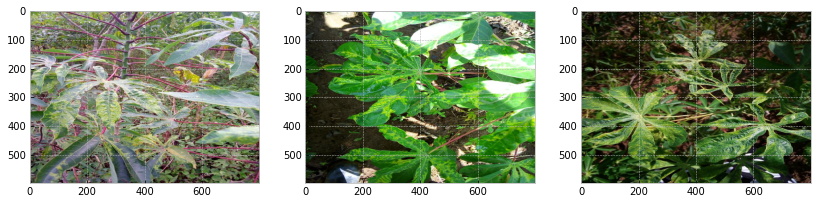

In [ ]:
samples = df[df['label']==3].sample(3)

plt.figure(figsize=(14,6))

for i, (image_id, label) in enumerate(zip(samples.image_id, samples.label)):
    plt.subplot(1,3,i+1)
    path = os.path.join('/content/cassava-leaf-diseases/CMD/',image_id)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()

**Class 4: "Healthy"**

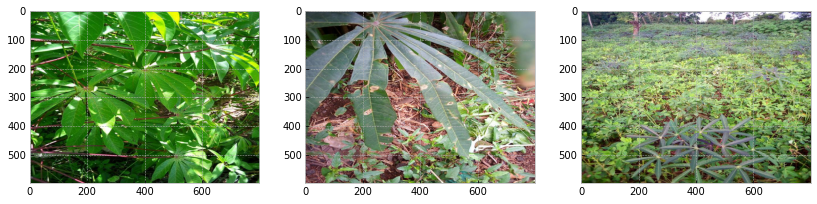

In [ ]:
samples = df[df['label']==4].sample(3)

plt.figure(figsize=(14,6))

for i, (image_id, label) in enumerate(zip(samples.image_id, samples.label)):
    plt.subplot(1,3,i+1)
    path = os.path.join('/content/cassava-leaf-diseases/Healthy/',image_id)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21397 entries, 0 to 21396
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  21397 non-null  object
 1   label     21397 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 334.5+ KB


**Image augmentation**

In [ ]:
import albumentations as A


In [ ]:
transform = A.Compose([
    A.RandomResizedCrop(256,256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.25),
    A.Transpose(p=0.25),
    A.RandomBrightnessContrast(
                brightness_limit=(-0.1,0.1), 
                contrast_limit=(-0.1, 0.1), 
                p=0.5)
#     A.Normalize(
#                 mean=[0.485, 0.456, 0.406], 
#                 std=[0.229, 0.224, 0.225], 
#                 max_pixel_value=255.0, 
#                 p=1.0)
])

In [ ]:
def plot_augmentations(ids, n, transform):
#     np.random.seed(0)
    rand_ids = np.random.choice(ids, size=n)
    
    fig = plt.figure(figsize=(15, 25))
    fig.suptitle('Original Image vs Transformed Image')
    #for i in range(0, 2*n, 2):
        #image = cv2.imread(os.path.join('/content/cassava-leaf-diseases/Healthy/', rand_ids[int(i/2)]))
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #fig.add_subplot(n, 2, i+1)
        #plt.imshow(image)
        #plt.grid(None)

    for i, (image_id, label) in enumerate(zip(samples.image_id, samples.label)):
        plt.subplot(1,3,i+1)
        path = os.path.join('/content/cassava-leaf-diseases/Healthy',image_id)
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        
        transformed = transform(image=image)
        transformed_image = transformed['image']
        #fig.add_subplot(n, 2, i+2)
        plt.imshow(transformed_image)
        plt.grid(None)


  

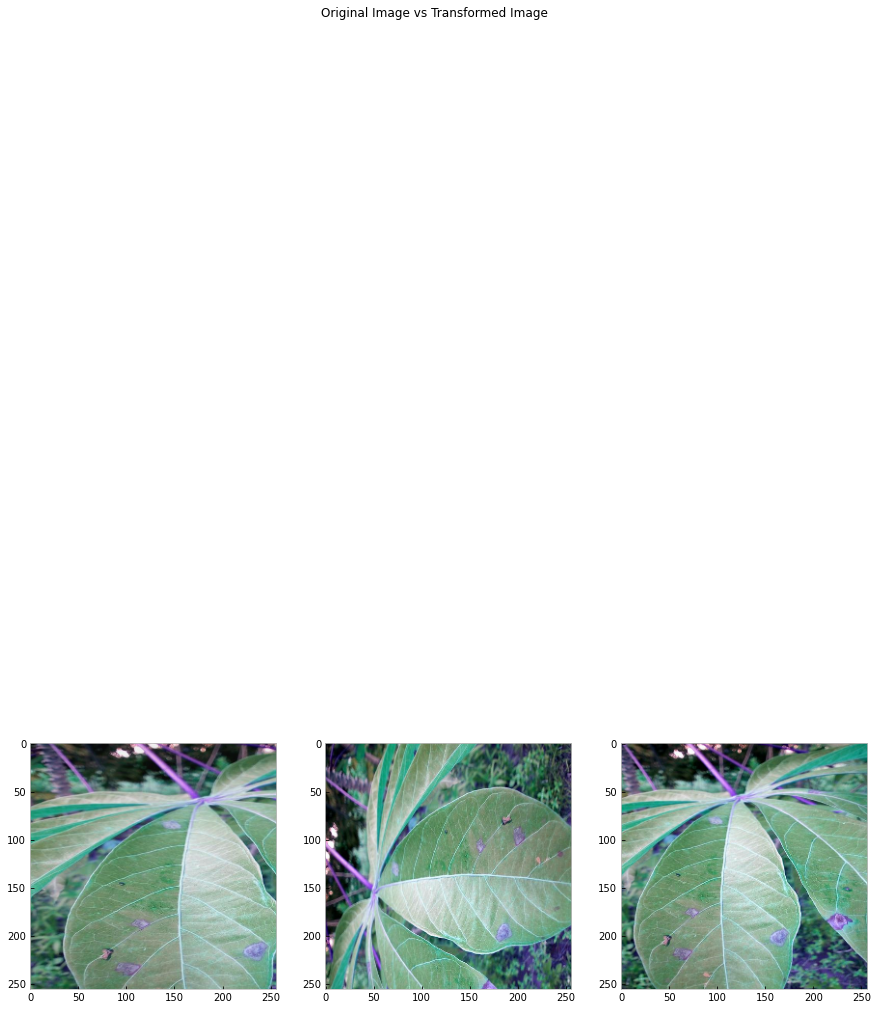

In [ ]:
ids = df['image_id'].values
plot_augmentations(ids, 2, transform)